In [1]:
from typing import TypedDict,List
from langgraph.graph import StateGraph, START,END

In [3]:
class AgentState(TypedDict):
   n1:int
   n2:int
   n3:int
   n4:int
   op1:str
   op2:str
   res1:str
   res2:str

In [6]:
def decide_next_node1(state:AgentState)-> AgentState:
  if state["op1"] == "+":
    return "add1"
  if state["op1"] == "-":
    return "sub1"

def decide_next_node2(state:AgentState)-> AgentState:
  if state["op2"] == "+":
    return "add2"
  if state["op2"] == "-":
    return "sub2" 

def add_one(state:AgentState)->AgentState:
  """This node adds n1 and n2"""
  state['res1'] = f"sum1 = {state['n1']+state['n2']}"
  return state

def sub_one(state:AgentState)->AgentState:
  """This node subs n1 and n2"""
  state['res1'] = f"diff1 = {state['n1']-state['n2']}"
  return state

def add_two(state:AgentState)->AgentState:
  """This node adds n3 and n4"""
  state['res2'] = f"sum2 = {state['n3']+state['n4']}"
  return state

def sub_two(state:AgentState)->AgentState:
  """This node subss n3 and n4"""
  state['res2'] = f"diff2 = {state['n3']-state['n4']}"
  return state

In [8]:
graph = StateGraph(AgentState)

graph.add_node("r1",lambda state:state)
graph.add_node("add1",add_one)
graph.add_node("sub1",sub_one)
graph.add_node("r2",lambda state:state)
graph.add_node("add2",add_two)
graph.add_node("sub2",sub_two)

graph.add_edge(START,"r1")
graph.add_conditional_edges(
  "r1",
  decide_next_node1,
  {
    "add1":"add1",
    "sub1":"sub1"
  }
)

graph.add_edge("add1","r2")
graph.add_edge("sub1","r2")




graph.add_conditional_edges(
  "r2",
  decide_next_node2,
  {
    "add2":"add2",
    "sub2":"sub2"
  }
)

graph.add_edge("add2",END)
graph.add_edge("sub2",END)

app = graph.compile()

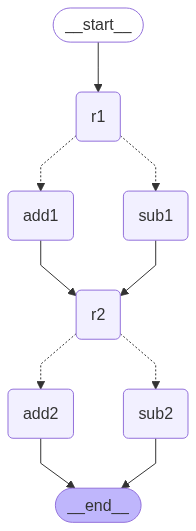

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
print(app.invoke({"n1":10,"n2":15,"n3":15,"n4":10,"op1":"-","op2":"+"}))

{'n1': 10, 'n2': 15, 'n3': 15, 'n4': 10, 'op1': '-', 'op2': '+', 'res1': 'diff1 = -5', 'res2': 'sum2 = 25'}
